# Alura Course - Seaborn for data visualization

## Downloading data

In [1]:
from helper import data_acquisition

In [2]:
data_acquisition.from_url('https://s3.amazonaws.com/caelum-online-public/1039-seaborn/material/tips.csv')

## Importing libs

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
from scipy.stats import ranksums

## Importing data

In [6]:
dataframe = pd.read_csv('./data/tips.csv')

In [7]:
dataframe.sample(5)

,total_bill,tip,dessert,day,time,size
62,11.02,1.98,Yes,Sat,Dinner,2
139,13.16,2.75,No,Thur,Lunch,2
160,21.50,3.50,No,Sun,Dinner,4
57,26.41,1.50,No,Sat,Dinner,2
184,40.55,3.00,Yes,Sun,Dinner,2


## First analysis - Total Bill vs Tip

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

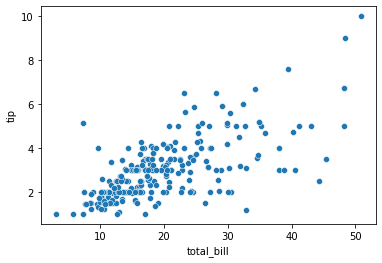

In [8]:
sns.scatterplot(x='total_bill', y='tip', data=dataframe)

### Adding a columns for tip %

In [9]:
dataframe['percent'] = dataframe['tip'] / dataframe['total_bill']

In [10]:
dataframe.percent = dataframe.percent.round(2)

In [11]:
dataframe.sample(5)

,total_bill,tip,dessert,day,time,size,percent
198,13.00,2.00,Yes,Thur,Lunch,2,0.15
100,11.35,2.50,Yes,Fri,Dinner,2,0.22
155,29.85,5.14,No,Sun,Dinner,5,0.17
119,24.08,2.92,No,Thur,Lunch,4,0.12
229,22.12,2.88,Yes,Sat,Dinner,2,0.13


<AxesSubplot:xlabel='total_bill', ylabel='percent'>

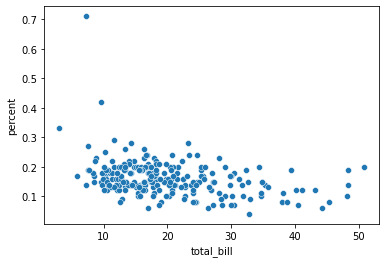

In [12]:
sns.scatterplot(x='total_bill', y ='percent', data=dataframe)

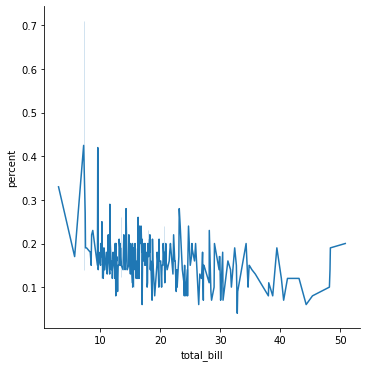

In [13]:
sns.relplot(x='total_bill', y ='percent', data=dataframe, kind='line')

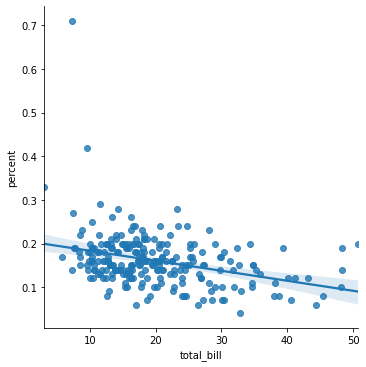

In [14]:
sns.lmplot(x='total_bill', y ='percent', data=dataframe)

## Second analysis - Dessert

In [15]:
by_dessert = dataframe.groupby('dessert')

In [16]:
by_dessert.get_group('Yes').describe()

,total_bill,tip,size,percent
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [17]:
by_dessert.get_group('No').describe()

,total_bill,tip,size,percent
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


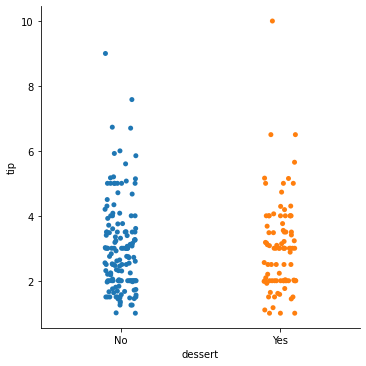

In [18]:
sns.catplot(x='dessert', y='tip', data=dataframe)

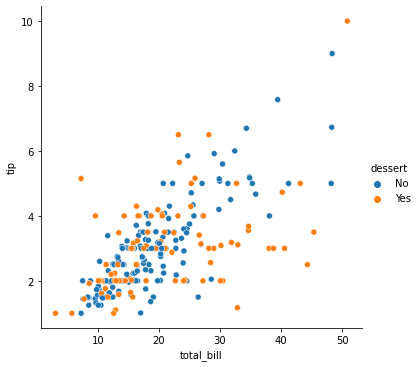

In [19]:
sns.relplot(x='total_bill', y='tip', hue='dessert', data=dataframe)

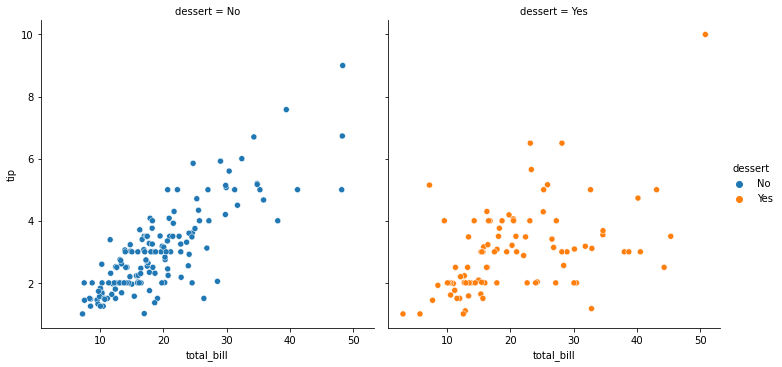

In [20]:
sns.relplot(x='total_bill', y='tip', hue='dessert', data=dataframe, col='dessert')

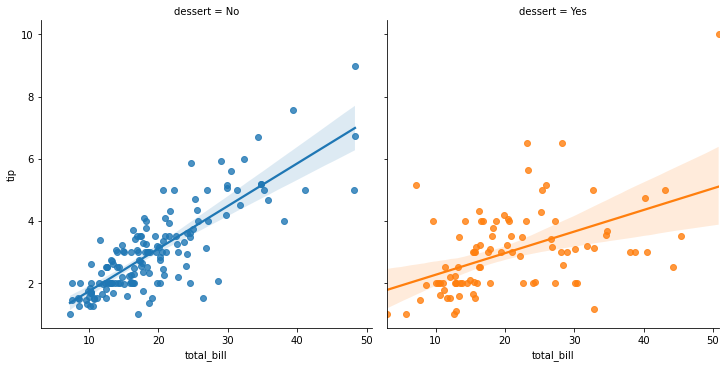

In [21]:
sns.lmplot(x='total_bill', y='tip', hue='dessert', col='dessert', data=dataframe)

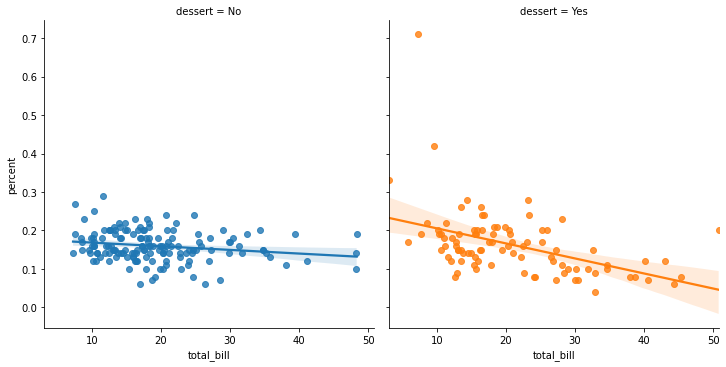

In [22]:
sns.lmplot(x='total_bill', y='percent', hue='dessert', col='dessert', data=dataframe)

### Hypothesis test

**H<sup>null</sup>** 
> the tip distribution is proportional for both the groups, people who ordered dessert and people who don't ordered dessert

**H<sup>alt</sup>**
> the tip distribution is not proportional for both the groups, people who ordered dessert and people who don't ordered dessert

In [23]:
dessert_yes = dataframe.query("dessert == 'Yes'").percent

In [24]:
dessert_no = dataframe.query("dessert == 'No'").percent

In [25]:
ranksums(dessert_yes, dessert_no)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

The P-value is 0.5266635660124415

**H<sup>null</sup>** 
> the tip distribution is proportional for both the groups, people who ordered dessert and people who don't ordered dessert

## Third analysis - Weekday

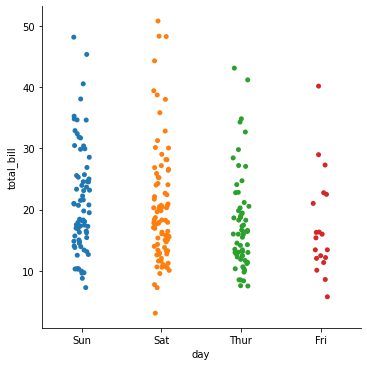

In [26]:
sns.catplot(x='day', y='total_bill', data=dataframe)

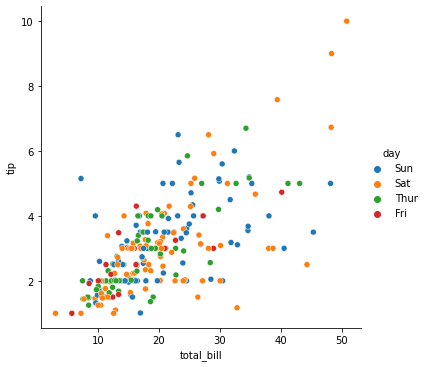

In [27]:
sns.relplot(x='total_bill', y='tip', hue='day', data=dataframe)

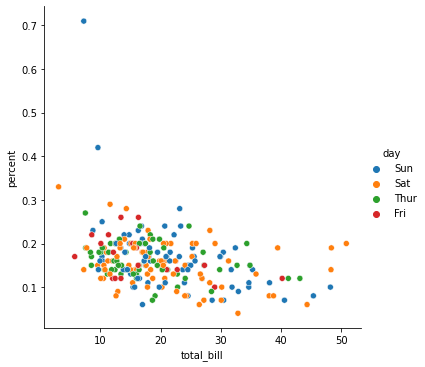

In [28]:
sns.relplot(x='total_bill', y='percent', hue='day', data=dataframe)

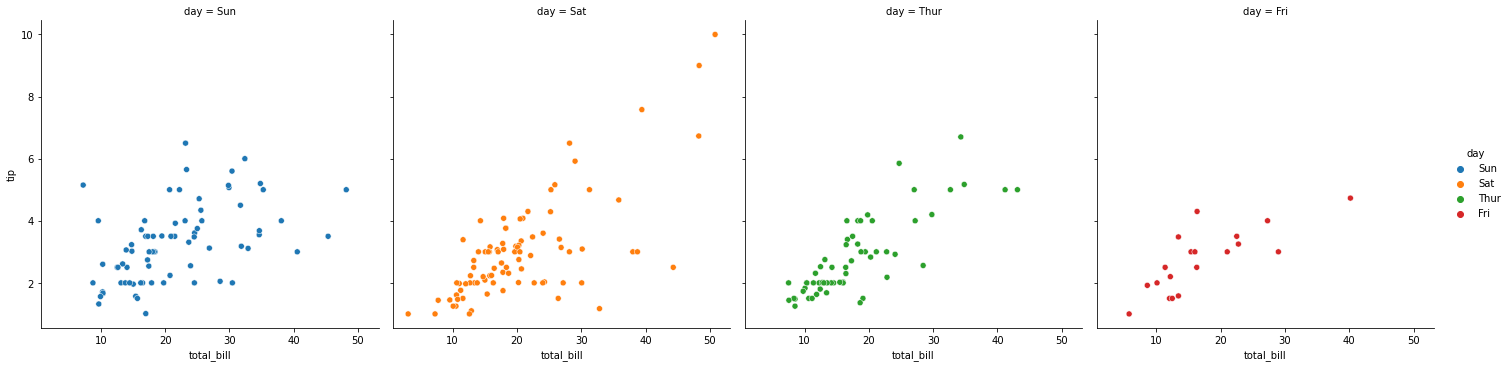

In [29]:
sns.relplot(x='total_bill', y='tip', hue='day', col='day', data=dataframe)

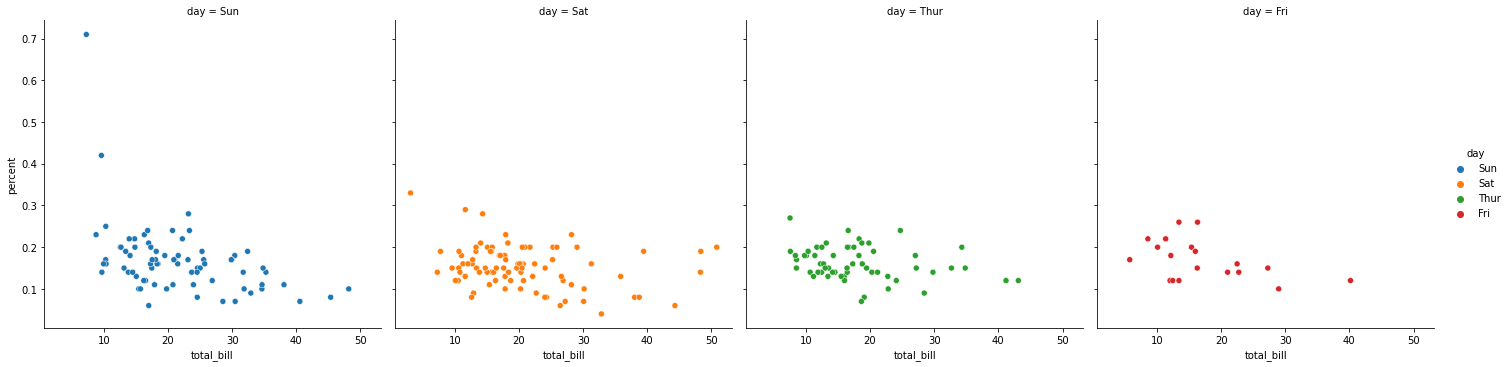

In [30]:
sns.relplot(x='total_bill', y='percent', hue='day', col='day', data=dataframe)

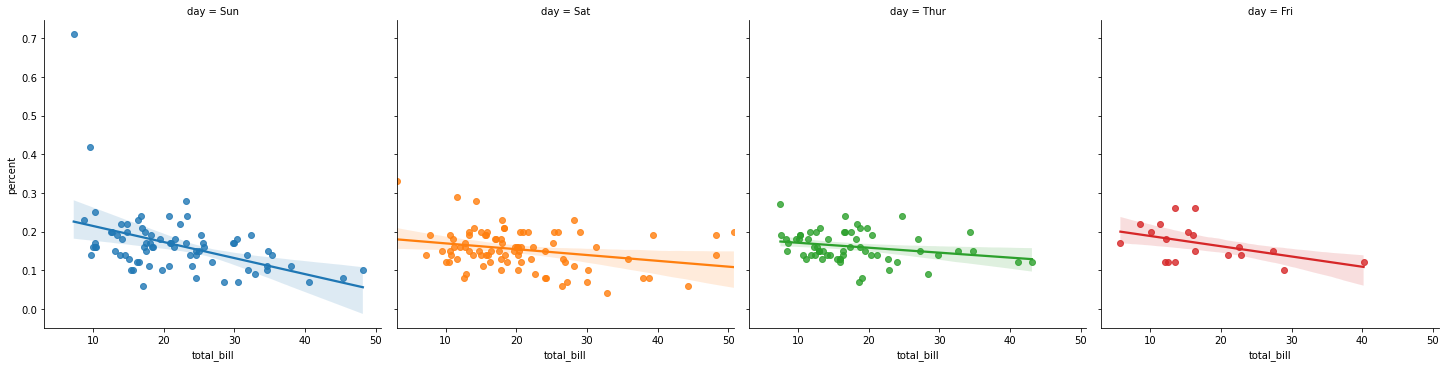

In [31]:
sns.lmplot(x='total_bill', y='percent', hue='day', col='day', data=dataframe)

In [32]:
dataframe.tip.mean()

2.99827868852459

In [33]:
dataframe.groupby('day').mean()

,total_bill,tip,size,percent
day,,,,
Fri,17.151579,2.734737,2.105263,0.169474
Sat,20.441379,2.993103,2.517241,0.153678
Sun,21.410000,3.255132,2.842105,0.166974
Thur,17.682742,2.771452,2.451613,0.161129


In [34]:
dataframe.day.value_counts().to_frame().rename(columns={ 'day': 'Frequency by weekday' })

,Frequency by weekday
Sat,87
Sun,76
Thur,62
Fri,19


### Hypothesis test

**H<sup>null</sup>**
> The total bill distribution is the same on saturday and sunday

**H<sup>alt</sup>**
> The total bill distribution is not the same on saturday and sunday

In [35]:
total_bill_sat = dataframe.query("day == 'Sat'").total_bill

In [36]:
total_bill_sun = dataframe.query("day == 'Sun'").total_bill

In [37]:
ranksums(total_bill_sat, total_bill_sun)

RanksumsResult(statistic=-0.9198084864360142, pvalue=0.3576728477868443)

**H<sup>null</sup>**
> The total bill distribution is the same on saturday and sunday

## Fouth analysis - Time

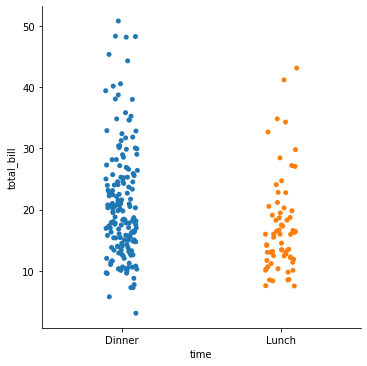

In [38]:
sns.catplot(x='time', y='total_bill', data=dataframe)

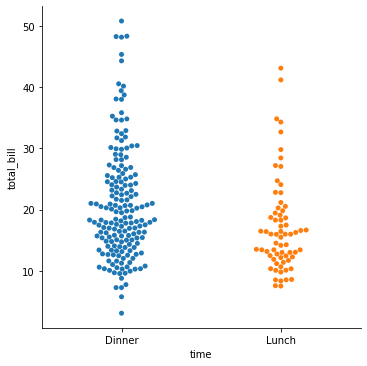

In [39]:
sns.catplot(x='time', y='total_bill', kind='swarm', data=dataframe)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

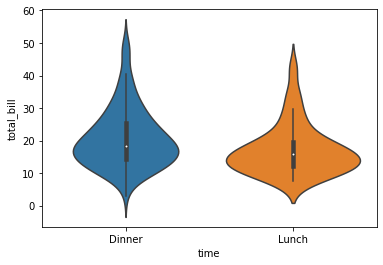

In [40]:
sns.violinplot(x='time', y='total_bill', data=dataframe)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

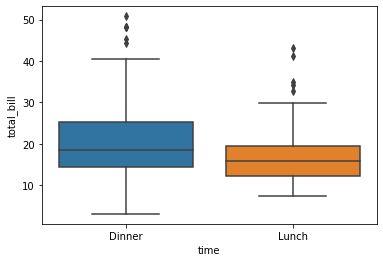

In [41]:
sns.boxplot(x='time', y='total_bill', data=dataframe)

In [42]:
lunch = dataframe.query("time == 'Lunch'").total_bill

In [43]:
dinner = dataframe.query("time == 'Dinner'").total_bill

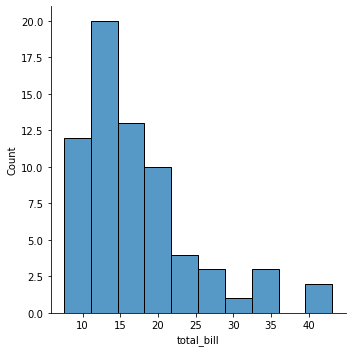

In [44]:
sns.displot(lunch)

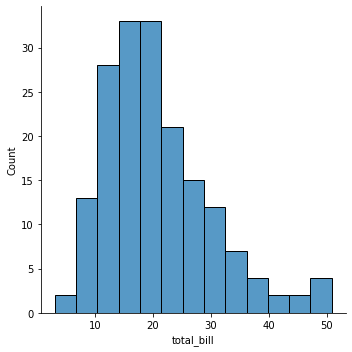

In [45]:
sns.displot(dinner)

In [46]:
dataframe.groupby('time').mean()

,total_bill,tip,size,percent
time,,,,
Dinner,20.797159,3.102670,2.630682,0.159773
Lunch,17.168676,2.728088,2.411765,0.163971


### Hypothesis test

**H<sup>null</sup>**
> The total bill distribution is the same on lanch and dinner

**H<sup>alt</sup>**
> The total bill distribution is not the same on lunch and dinner

In [47]:
ranksums(lunch, dinner)

RanksumsResult(statistic=-3.2438872807262955, pvalue=0.0011791039723641672)

**H<sup>alt</sup>**
> The total bill distribution is not the same on lunch and dinner

**H<sup>null</sup>**
> The tip distribution is the same on lanch and dinner

**H<sup>alt</sup>**
> The tip distribution is not the same on lunch and dinner

In [48]:
lunch = dataframe.query("time == 'Lunch'").percent

In [49]:
dinner = dataframe.query("time == 'Dinner'").percent

In [50]:
ranksums(lunch, dinner)

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)

**H<sup>null</sup>**
> The tip distribution is the same on lanch and dinner